In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error

In [4]:
train_df_temp = pd.read_csv('train.csv')
test_df_temp = pd.read_csv('test.csv')
print(f'shape of train is {train_df_temp.shape}\n shape of test is {test_df_temp.shape}\n')
train_df_temp.head()

shape of train is (630000, 13)
 shape of test is (270000, 12)



,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [6]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [24]:
train_df_temp['exp_exam_score']=np.expm1(train_df_temp['exam_score'])

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_df_temp,x='exam_score',kde=True,alpha =0.8)
plt.title('Distribution of exam score:-')
plt.xlabel('Exam score')
plt.ylabel('Frequency')
plt.axvline(train_df_temp['exam_score'].mean(),color = 'red',linestyle ='--',linewidth=3,label =f'Mean {train_df_temp['exam_score'].mean():.2f}')
plt.axvline(train_df_temp['exam_score'].median(),color = 'yellow',linestyle ='-',linewidth=2,label =f'Median{train_df_temp['exam_score'].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
num_features = (train_df_temp.select_dtypes(include=['int','float']).columns.drop('exam_score').to_list())
num_features.remove('id')
cat_features = train_df_temp.select_dtypes('object').columns.to_list()
print(num_features)
print(cat_features)


['age', 'study_hours', 'class_attendance', 'sleep_hours']
['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']


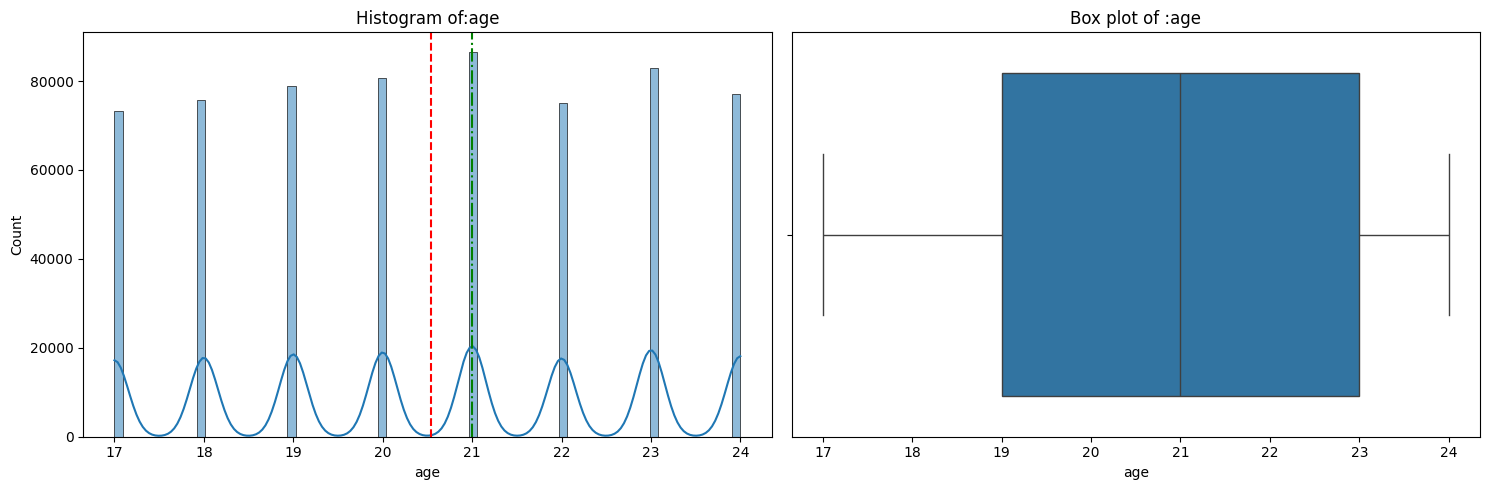

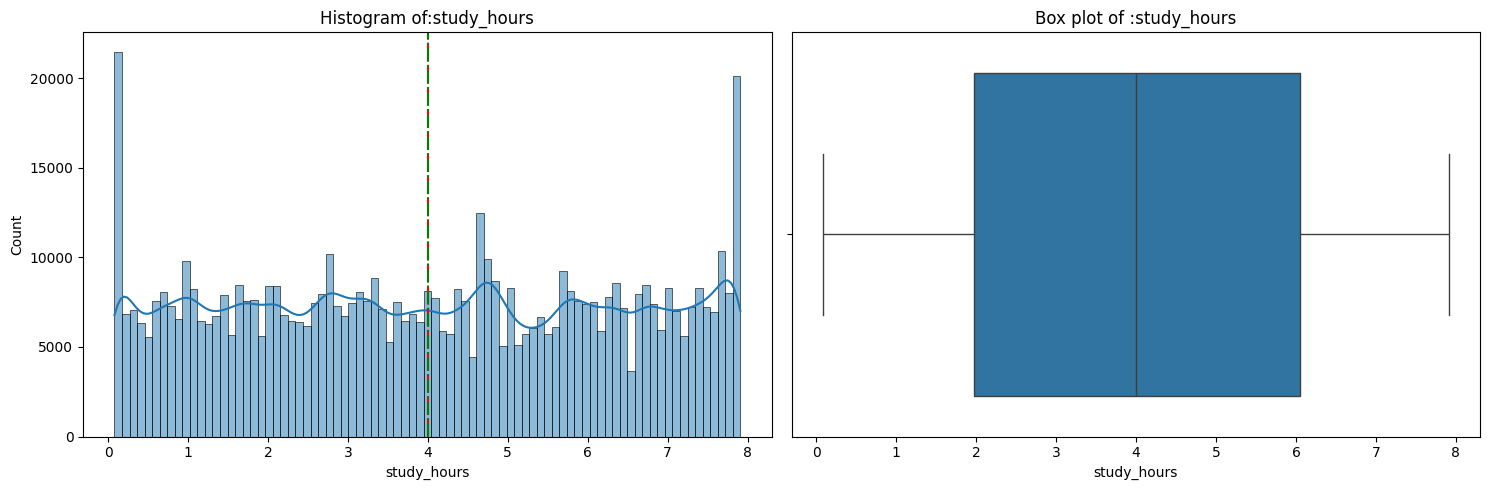

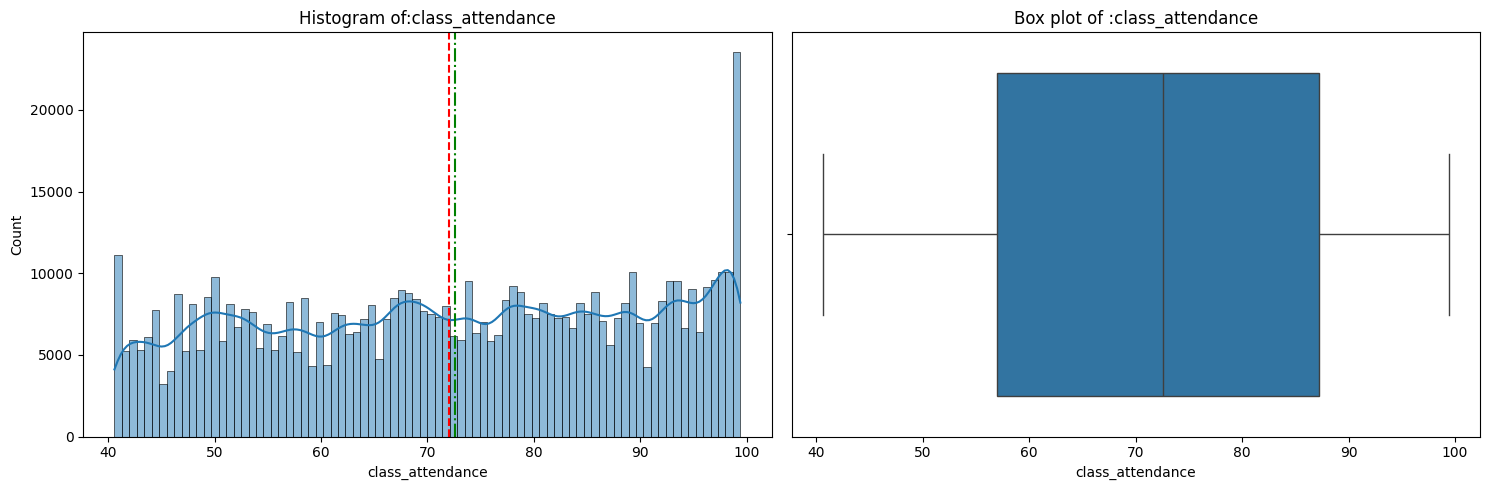

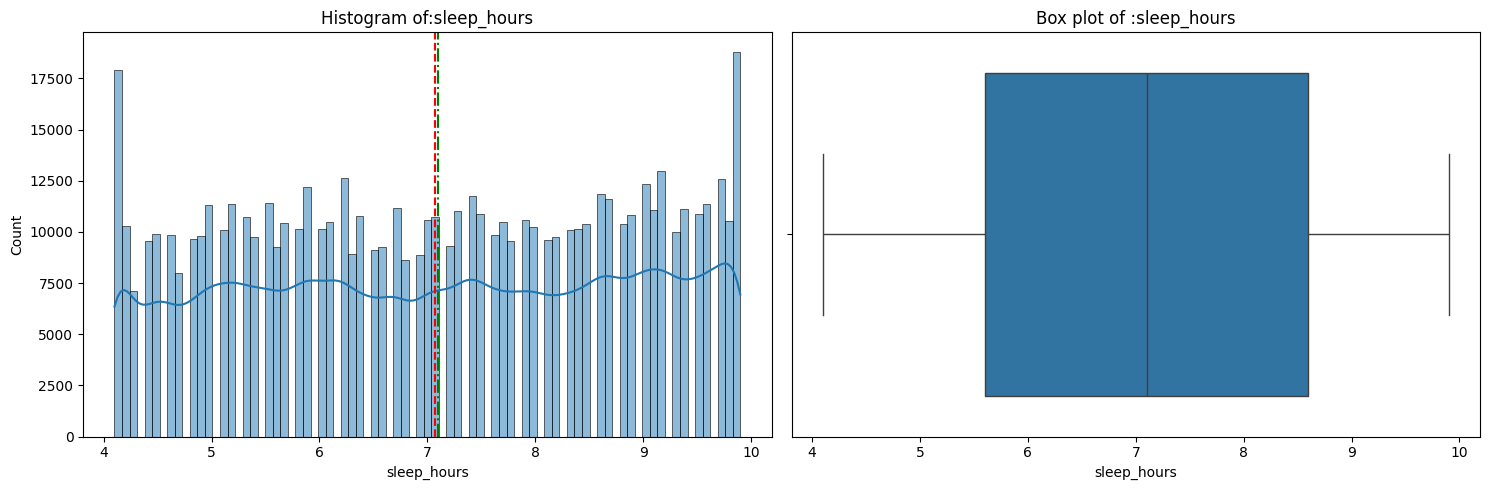

In [9]:
for column in num_features:
    if column=='id':
        continue
    fig,axis = plt.subplots(1,2,figsize=(15,5))
    sns.histplot(train_df_temp,x=column,ax=axis[0],kde=True)
    axis[0].axvline(train_df_temp[column].mean(),color='red',linestyle='--',label = f'Mean is : {train_df_temp[column].mean()}')
    axis[0].axvline(train_df_temp[column].median(),color='green',linestyle='-.',label = f'Median is : {train_df_temp[column].median()}')
    axis[0].set_title(f'Histogram of:{column}')
    sns.boxplot(data=train_df_temp,x=column,ax=axis[1])
    axis[1].set_title(f'Box plot of :{column}')
    plt.tight_layout()
plt.show()

<Axes: xlabel='study_hours', ylabel='Count'>

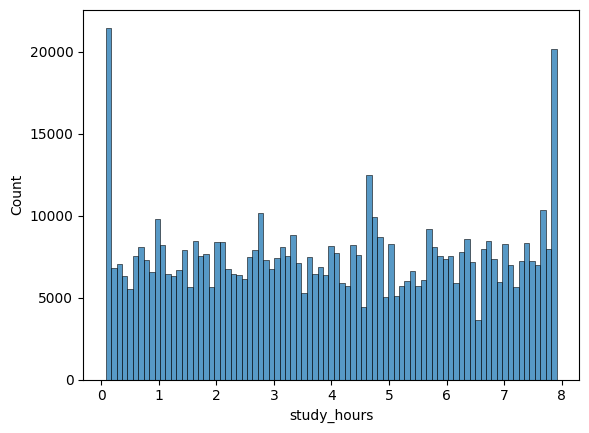

In [10]:
df_temp=train_df_temp.copy()
# df_temp['study_hours_square']=df_temp['study_hours']**2;
# sns.histplot(data=df_temp,x='study_hours_square')
# df_temp['study_hours_cube']=df_temp['study_hours']**3;
# sns.histplot(data=df_temp,x='study_hours_cube')
# df_temp['study_hours_log']=df_temp['study_hours']);
sns.histplot(df_temp['study_hours'])

<Axes: >

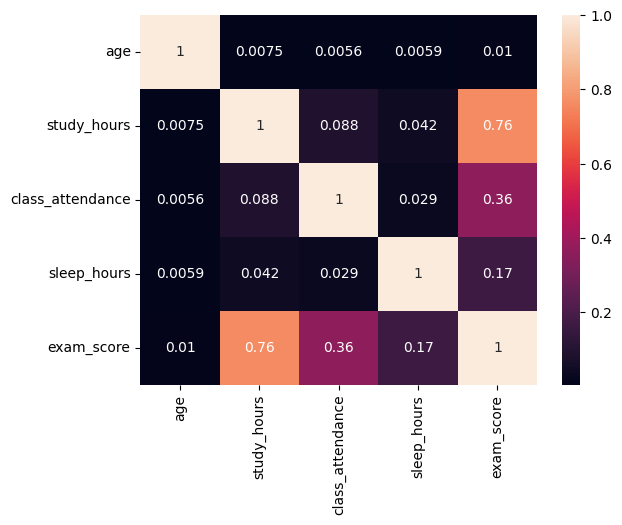

In [11]:
a=num_features.append('exam_score')
sns.heatmap(df_temp[num_features].corr(),annot=True,color='blue')

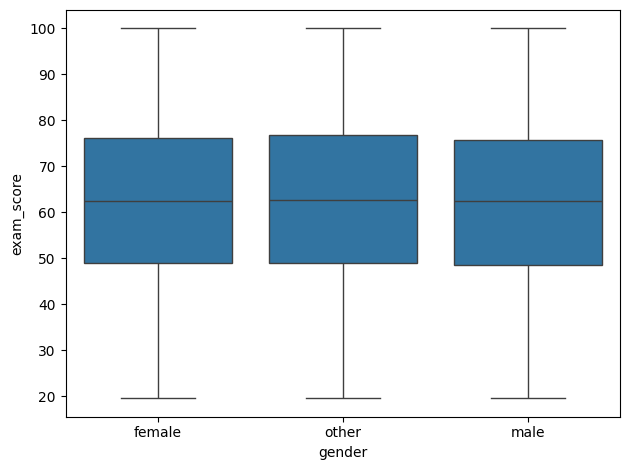

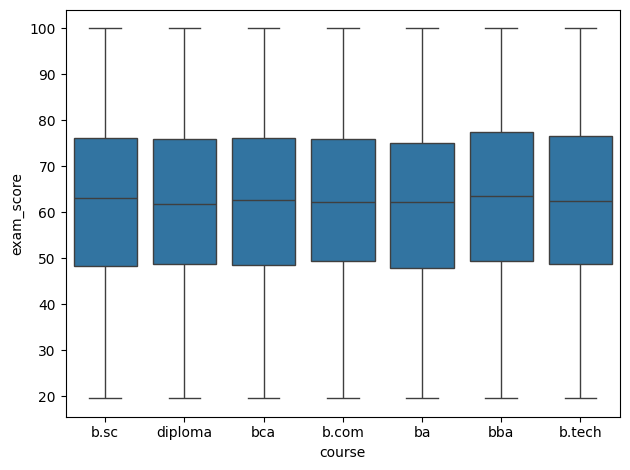

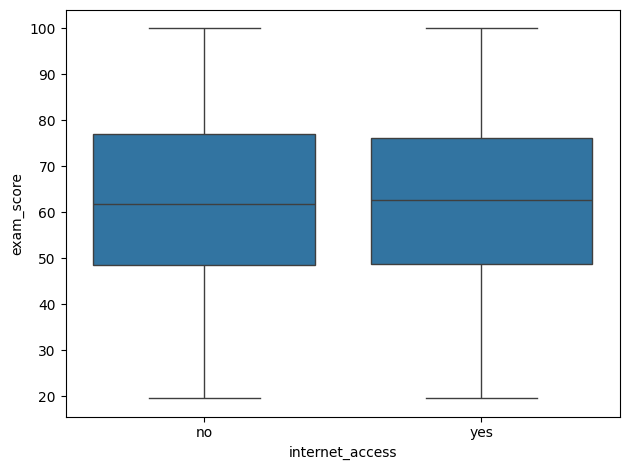

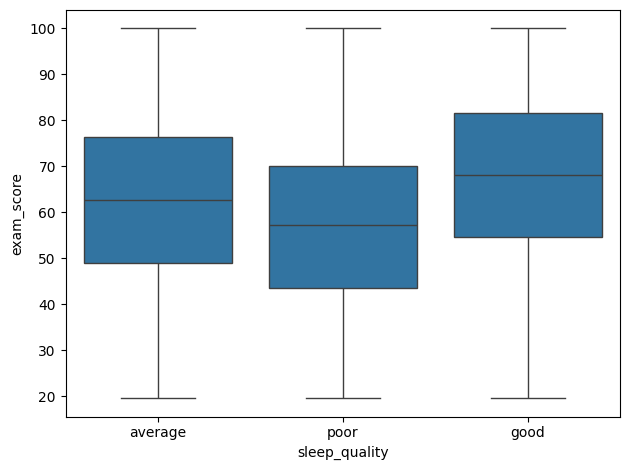

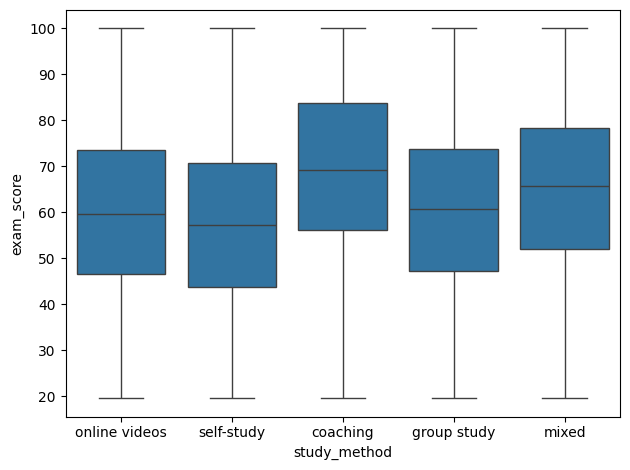

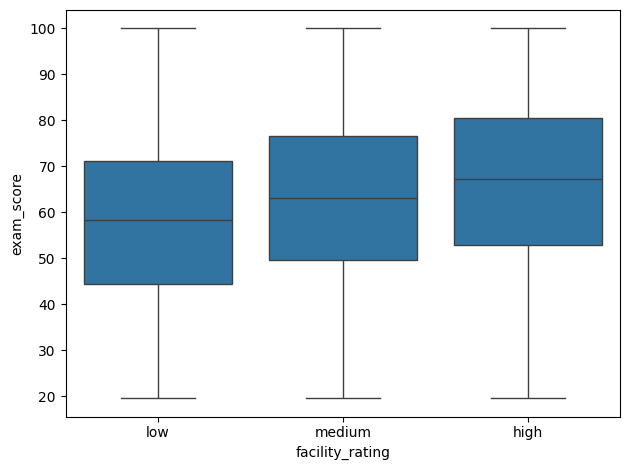

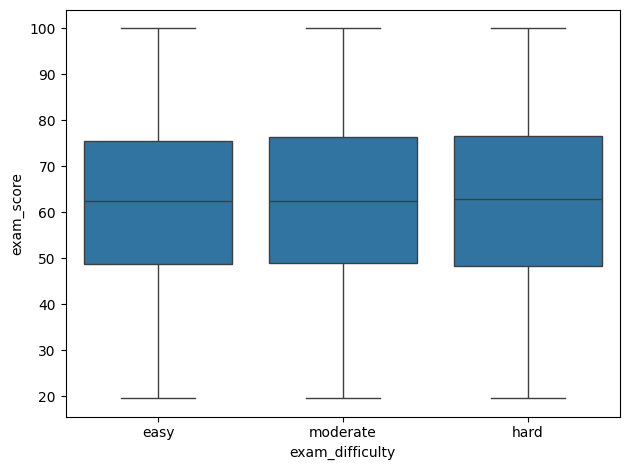

In [12]:
for col in cat_features:
    sns.boxplot(data=train_df_temp,x=col, y='exam_score',)
    plt.tight_layout()
    plt.show()

In [13]:
test_df_temp.columns

Index(['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty'],
      dtype='object')

-0.03998608463186637


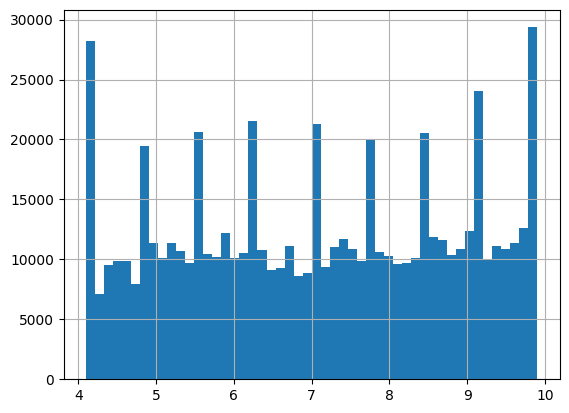

In [14]:
df_temp['sleep_hours'].hist(bins=50)
print(df_temp['sleep_hours'].skew())

In [15]:
def feature_engineering(data):
    df_temp = data.copy()
    base_feature = ['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty']
    #domunant features transformation
    df_temp['study_hours_squared']=df_temp['study_hours']**2;
    # df_temp['study_hours_cubed']=df_temp['study_hours']**3;
    df_temp['class_attendance_squared']=df_temp['class_attendance']**2;
    df_temp['log_study_hours'] = np.log1p(df_temp['study_hours'])
    df_temp['log_class_attendance'] = np.log1p(df_temp['class_attendance'])
    df_temp['log_sleep_hours'] = np.log1p(df_temp['sleep_hours'])
    df_temp['sqrt_study_hours'] = np.sqrt(df_temp['study_hours'])
    df_temp['sqrt_class_attendance'] = np.sqrt(df_temp['class_attendance'])

    #Interaction feature
    df_temp['study_hours_into_class_attendance']=df_temp['sleep_hours']*df_temp['class_attendance']
    df_temp['study_hours_into_sleep_hours']=df_temp['study_hours']*df_temp['sleep_hours']

    #ratio features
    eps = 1e-5
    df_temp['study_hours_over_sleep']=df_temp['study_hours']/(df_temp['sleep_hours']+eps)
    df_temp['attendence_over_sleep']=df_temp['class_attendance']/(df_temp['sleep_hours']+eps)

    #Categorical encoding
    sleep_quality_map ={'poor':0, 'good':1, 'average':2}
    exam_difficulty_map ={'moderate':0, 'easy':1, 'hard':2}
    facility_rating_map ={'medium':1, 'low':0, 'high':2}

    df_temp['sleep_quality_num']=df_temp['sleep_quality'].map(sleep_quality_map).astype(int)
    df_temp['exam_difficulty_num']=df_temp['exam_difficulty'].map(exam_difficulty_map).astype(int)
    df_temp['facility_rating_num']=df_temp['facility_rating'].map(facility_rating_map).astype(int)

    #encoded categorical and numerical values
    df_temp['study_hours_and_sleep_quality']=df_temp['study_hours']*df_temp['sleep_quality_num']
    df_temp['attendence_and_facility']=df_temp['class_attendance']*df_temp['facility_rating_num']
    df_temp['sleep_hours_and_exam_difficulty']=df_temp['sleep_hours']*df_temp['exam_difficulty_num']

    #learning efficiency
    df_temp['efficiency']=(df_temp['sleep_hours']*df_temp['class_attendance'])/(df_temp['sleep_hours']+1)
    mod_features=['attendence_and_facility',
                 'attendence_over_sleep',
                 'class_attendance_squared',
                 'efficiency',
                 'exam_difficulty_num',
                 'facility_rating_num',
                 'id',
                 'log_class_attendance',
                 'log_sleep_hours',
                 'log_study_hours',
                 'sleep_hours_and_exam_difficulty',
                 'sleep_quality_num',
                 'sqrt_class_attendance',
                 'sqrt_study_hours',
                 'study_hours_and_sleep_quality',
                 'study_hours_into_class_attendance',
                 'study_hours_into_sleep_hours',
                 'study_hours_over_sleep',
                 'study_hours_squared']
    return df_temp[mod_features + base_feature]
    
    

In [21]:
x_train_raw = feature_engineering(train_df_temp)
x_test_raw = feature_engineering(test_df_temp)
y_raw = train_df_temp['exam_score'].reset_index(drop=True)
full_data = pd.concat([x_train_raw,x_test_raw],axis=0)

In [23]:
featured_cols = [col for col in full_data.columns.difference(cat_features+num_features) ]
featured_cols

['attendence_and_facility',
 'attendence_over_sleep',
 'class_attendance_squared',
 'efficiency',
 'exam_difficulty_num',
 'facility_rating_num',
 'id',
 'log_class_attendance',
 'log_sleep_hours',
 'log_study_hours',
 'sleep_hours_and_exam_difficulty',
 'sleep_quality_num',
 'sqrt_class_attendance',
 'sqrt_study_hours',
 'study_hours_and_sleep_quality',
 'study_hours_into_class_attendance',
 'study_hours_into_sleep_hours',
 'study_hours_over_sleep',
 'study_hours_squared']

In [25]:
for col in featured_cols:
    full_data[col].astype(float)

In [38]:
base_feature = ['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty']
mod_features=['attendence_and_facility',
                 'attendence_over_sleep',
                 'class_attendance_squared',
                 'efficiency',
                 'exam_difficulty_num',
                 'facility_rating_num',
                 'id',
                 'log_class_attendance',
                 'log_sleep_hours',
                 'log_study_hours',
                 'sleep_hours_and_exam_difficulty',
                 'sleep_quality_num',
                 'sqrt_class_attendance',
                 'sqrt_study_hours',
                 'study_hours_and_sleep_quality',
                 'study_hours_into_class_attendance',
                 'study_hours_into_sleep_hours',
                 'study_hours_over_sleep',
                 'study_hours_squared']


In [40]:
for col in base_feature:
    full_data[col] = full_data[col].astype(str)
    full_data[col] = full_data[col].astype('category')

for col in mod_features:
    full_data[col] = full_data[col].astype(float)

In [62]:
x_train= full_data.iloc[:len(train_df_temp)].copy()
x_test = full_data.iloc[len(train_df_temp):len(train_df_temp)+len(test_df_temp)].copy()
print(x_train.shape)
print(x_test.shape)
print(y_raw.shape)

(630000, 31)
(270000, 31)
(630000,)


In [46]:
kf = KFold(n_splits=10,shuffle=True,random_state=48)

In [82]:
import xgboost as xgb
xgb_params = {
    'n_estimators': 15000,
    'learning_rate': 0.005,
    'max_depth': 9,
    'subsample': 0.75,
    'reg_lambda': 5,
    'reg_alpha': 0.1,
    'colsample_bytree': 0.5,
    'colsample_bynode': 0.6,
    'min_child_weight': 5,
    'tree_method': 'hist',
    'random_state': 42,
    'early_stopping_rounds': 80,
    'eval_metric': 'rmse',
    'enable_categorical': True,
    'device':'cpu'
}

test_predictions=[]
oof_predictions=np.zeros(len(x_train))

for fold,(train_index,val_index) in enumerate(kf.split(x_train,y_raw)):
    print(f"\n --- Fold{fold+1} ---")
    x_train_fold,x_val_fold = x_train.iloc[train_index],x_train.iloc[val_index]
    y_train_fold,y_val_fold = y_raw.iloc[train_index],y_raw.iloc[val_index]

    model = xgb.XGBRegressor(**xgb_params)
    model.fit(x_train_fold,y_train_fold,eval_set=[(x_val_fold,y_val_fold)],verbose=1000)
    val_preds = model.predict(x_val_fold)
    oof_predictions[val_index]=val_preds
    rmse = root_mean_squared_error(y_val_fold,val_preds)
    print(f"RMSE : {rmse}")

    test_preds = model.predict(x_test)
    test_predictions.append(test_preds)

oof_rmse = root_mean_squared_error(y_raw,oof_predictions)
print("\n-----------------")
print(f"oof rmse : {oof_rmse}")




 --- Fold1 ---
[0]	validation_0-rmse:18.89571


KeyboardInterrupt: 

In [76]:

x_train = x_train.loc[:, ~x_train.columns.duplicated()]
x_test  = x_test.loc[:, ~x_test.columns.duplicated()]
print(x_train.columns.duplicated().any())
print(x_test.columns.duplicated().any())

False
False
